In [2]:
##########################################################################################
############################ PREDICTION WITH DECISION TREE ###############################
############################## Business Contract Prediction ##############################
##########################################################################################
# Load libraries
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patsy import dmatrices
from sklearn import metrics
# Compile UDFs

In [2]:

##########################################################################################
##################################### Decision Tree Models ###############################
##########################################################################################
# Steps:
#    Load packages
#    Compile user defined functions (here for Confusion matrix & ROC/AUC Plots
#    Read base data & prediction data
#    check basic records
#    Split base data to X, Y
#    Train test split
#    Fit Decision Tree model
#    Parameter optimization with grid search
#    systematic grid search & CV on train~test data
#    select best model
#    apply on test data
#    evaluate performance:
#        CF
#        ROC/AUC
#    apply the best model on whole data
#    Data prep for prediction file
#    Generate final prediction
#    Collate & export to CSV

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'
set_option('display.width', 90)

In [5]:
################### Read input data
# Input-1: Base or Training Data
filename1 = 'C:\\Users\\pd147\\Downloads\\Premnath\\Python Training\\NearLearn\\NearLearn-Contents_ML with Python_20032018\\6. Advanced ML Algorithm- Vol 2\\Decision Tree Case Study\\BizContract.csv'
data = read_csv(filename1)
data.shape
data.head()

(750, 12)

,Result,Product,PriceDiscount,Value,Priority,SalesChannel,Competiton,Duration_Stage1,Duration_Stage2,Duration_Stage3,Duration_Stage4,Duration_Stage5
0,1,P02,None,617.54,Mid,Direct,Yes,2,2,2,5,2
1,0,P05,High,10000.00,Lowest,Mixed,Yes,0,0,7,7,7
2,0,P09,None,3145.00,Lowest,Direct,Maybe,0,0,9,63,9
3,0,P07,None,100.00,Lowest,Direct,Yes,0,3,12,22,12
4,0,P07,None,900.00,Lowest,Direct,Maybe,36,36,36,108,36


In [6]:
# Input-2: Prediction data
filename2 = 'C:\\Users\\pd147\\Downloads\\Premnath\\Python Training\\NearLearn\\NearLearn-Contents_ML with Python_20032018\\6. Advanced ML Algorithm- Vol 2\\Decision Tree Case Study\\BizContract_Pred.csv'
pred = read_csv(filename2)
pred.shape
pred.head()

(250, 11)

,Product,PriceDiscount,Value,Priority,SalesChannel,Competiton,Duration_Stage1,Duration_Stage2,Duration_Stage3,Duration_Stage4,Duration_Stage5
0,P01,None,1620.00,Lowest,Direct,Maybe,2,2,2,6,2
1,P01,None,227.06,Lowest,Direct,Maybe,0,0,0,0,0
2,P01,None,1500.00,Lowest,Direct,Maybe,75,75,75,226,75
3,P01,None,1000.00,Mid,Direct,Maybe,0,0,2,2,2
4,P03,Mid,4020.48,Mid,Mixed,Yes,3,3,3,8,3


In [6]:
set_option('display.max_rows', 500)
data.dtypes
pred.dtypes

Result               int64
Product             object
PriceDiscount       object
Value              float64
Priority            object
SalesChannel        object
Competiton          object
Duration_Stage1      int64
Duration_Stage2      int64
Duration_Stage3      int64
Duration_Stage4      int64
Duration_Stage5      int64
dtype: object

Product             object
PriceDiscount       object
Value              float64
Priority            object
SalesChannel        object
Competiton          object
Duration_Stage1      int64
Duration_Stage2      int64
Duration_Stage3      int64
Duration_Stage4      int64
Duration_Stage5      int64
dtype: object

In [7]:
# Data description: base
set_option('display.width', 100)
set_option('precision', 2)
data.describe()


,Result,Value,Duration_Stage1,Duration_Stage2,Duration_Stage3,Duration_Stage4,Duration_Stage5
count,750.00,750.0,750.00,750.00,750.00,750.00,750.00
mean,0.49,7299.5,3.00,5.55,7.58,18.18,7.58
std,0.50,31000.3,7.37,9.95,12.12,26.59,12.12
min,0.00,0.1,0.00,0.00,0.00,0.00,0.00
25%,0.00,500.0,0.00,0.00,0.00,0.00,0.00
50%,0.00,1500.0,0.00,0.00,2.00,7.00,2.00
75%,1.00,4800.0,2.00,8.00,10.00,25.75,10.00
max,1.00,600080.0,61.00,61.00,71.00,184.00,71.00


In [9]:

###########################################################################################
############################  Model Building on train ~ test data  ########################
###########################################################################################

############# Create dummy
#df_dummy = pd.get_dummies(data)
#df_dummy.columns
#df_dummy.dtypes
#df_dummy.shape
#
## Extract X & Y
#X = df_dummy.values[:, 1:36]
#Y = df_dummy.values[:,0]

# set random seed
import random
random.seed(5)

# prep data
Y, X = dmatrices('Result~C(Product)+ C(PriceDiscount)+ Value+ C(Priority)+ C(SalesChannel)+ \
                 C(Competiton)+ Duration_Stage1+ Duration_Stage2+ Duration_Stage3+ Duration_Stage4+ Duration_Stage5',
                 data, return_type="dataframe")
print (len(X.columns))
print (X.columns)


31
Index(['Intercept', 'C(Product)[T.P02]', 'C(Product)[T.P03]', 'C(Product)[T.P04]',
       'C(Product)[T.P05]', 'C(Product)[T.P06]', 'C(Product)[T.P07]',
       'C(Product)[T.P08]', 'C(Product)[T.P09]', 'C(Product)[T.P10]',
       'C(Product)[T.P11]', 'C(Product)[T.P12]', 'C(PriceDiscount)[T.Low]',
       'C(PriceDiscount)[T.Mid]', 'C(PriceDiscount)[T.None]',
       'C(PriceDiscount)[T.Very_High]', 'C(Priority)[T.Low]', 'C(Priority)[T.Lowest]',
       'C(Priority)[T.Mid]', 'C(SalesChannel)[T.Indirect]', 'C(SalesChannel)[T.Misc]',
       'C(SalesChannel)[T.Mixed]', 'C(SalesChannel)[T.None]', 'C(Competiton)[T.No]',
       'C(Competiton)[T.Yes]', 'Value', 'Duration_Stage1', 'Duration_Stage2',
       'Duration_Stage3', 'Duration_Stage4', 'Duration_Stage5'],
      dtype='object')


In [10]:
# flatten y into a 1-D array
Y = np.ravel(Y)
Y

array([1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1.

In [11]:
############ Train ~ Test Split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 105)


In [12]:
############################ Model-1 with gini index #####################################
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 105,
                                  max_depth=2, min_samples_leaf=3)    
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=105,
            splitter='best')

In [3]:
DecisionTreeClassifier?

In [13]:
# Predict on test
y_pred = clf_gini.predict(X_test)
print(y_pred)

[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 1.]


In [13]:
############# Accuracy
print ("Accuracy based on Gini: ", accuracy_score(y_test,y_pred)*100 )

''' Accuracy changes with max_depth & min_samples_leaf 
(e.g, max_depth=5 decreases and min_samples_leaf=15 increases!!'''


Accuracy based on Gini:  70.22222222222221


' Accuracy changes with max_depth & min_samples_leaf \n(e.g, max_depth=5 decreases and min_samples_leaf=15 increases!!'

In [14]:

############################ Model-2 with Entropy #####################################
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 105,
                                     max_depth=2, min_samples_leaf=3)
clf_entropy.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=105,
            splitter='best')

In [15]:
# Predict on test
y_pred_en = clf_entropy.predict(X_test)
y_pred_en


array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1.])

In [16]:
# Accuracy
print("Accuracy based on Entropy: ", accuracy_score(y_test,y_pred_en)*100)


Accuracy based on Entropy:  70.22222222222221


In [14]:

############################ Optimize Model-2 with manual grid search  ###################
depth = []
for i in range(1,21):
    for j in range(1,21):        
        clf = DecisionTreeClassifier(criterion = "entropy", random_state = 105,
                                         max_depth=i, min_samples_leaf=j)    # Model is based on entropy
        clf = clf.fit(X_train,y_train)
        y_pred_en = clf.predict(X_test)
        depth.append((i,j,accuracy_score(y_test,y_pred_en)*100))
print(depth)


[(1, 1, 77.33333333333333), (1, 2, 77.33333333333333), (1, 3, 77.33333333333333), (1, 4, 77.33333333333333), (1, 5, 77.33333333333333), (1, 6, 77.33333333333333), (1, 7, 77.33333333333333), (1, 8, 77.33333333333333), (1, 9, 77.33333333333333), (1, 10, 77.33333333333333), (1, 11, 77.33333333333333), (1, 12, 77.33333333333333), (1, 13, 77.33333333333333), (1, 14, 77.33333333333333), (1, 15, 77.33333333333333), (1, 16, 77.33333333333333), (1, 17, 77.33333333333333), (1, 18, 77.33333333333333), (1, 19, 77.33333333333333), (1, 20, 77.33333333333333), (2, 1, 70.22222222222221), (2, 2, 70.22222222222221), (2, 3, 70.22222222222221), (2, 4, 70.22222222222221), (2, 5, 70.22222222222221), (2, 6, 70.22222222222221), (2, 7, 70.22222222222221), (2, 8, 70.22222222222221), (2, 9, 70.22222222222221), (2, 10, 70.22222222222221), (2, 11, 70.22222222222221), (2, 12, 70.22222222222221), (2, 13, 70.22222222222221), (2, 14, 70.22222222222221), (2, 15, 70.22222222222221), (2, 16, 70.22222222222221), (2, 17, 7

In [15]:

grid_summary=pd.DataFrame(depth)
grid_summary.columns =['max_depth', 'min_samples_leaf', 'Accuracy']
grid_summary.to_csv('C:\\Users\\pd147\\Downloads\\Premnath\\Python Training\\NearLearn\\NearLearn-Contents_ML with Python_20032018\\6. Advanced ML Algorithm- Vol 2\\Decision Tree Case Study\\grid_summary.csv', index=False)
print(grid_summary)

     max_depth  min_samples_leaf   Accuracy
0            1                 1  77.333333
1            1                 2  77.333333
2            1                 3  77.333333
3            1                 4  77.333333
4            1                 5  77.333333
5            1                 6  77.333333
6            1                 7  77.333333
7            1                 8  77.333333
8            1                 9  77.333333
9            1                10  77.333333
10           1                11  77.333333
11           1                12  77.333333
12           1                13  77.333333
13           1                14  77.333333
14           1                15  77.333333
15           1                16  77.333333
16           1                17  77.333333
17           1                18  77.333333
18           1                19  77.333333
19           1                20  77.333333
20           2                 1  70.222222
21           2                 2

In [16]:
########################## Improved model manual grid search ###################################
#  max_depth=3, min_samples_leaf=15 gives the best accuracy, let's take it.
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 105,
                                     max_depth=3, min_samples_leaf=15)
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=105,
            splitter='best')

In [17]:
# Predict on test
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1.])

In [18]:
# Accuracy
print ("Accuracy based on Entropy: ", accuracy_score(y_test,y_pred_en)*100)


Accuracy based on Entropy:  78.22222222222223


In [21]:
# But it does not do a CV, hence let's do a CV with systematic Grid-Search

############################ Optimize Model-2 with CV & grid search  ############################
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

param_grid = {'max_depth': np.arange(3, 20), 
              'max_features': np.arange(3,8),
              'min_samples_leaf': np.arange(3,20)}
gridOptim = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
gridOptim.fit(X_train, y_train)
gridOptim.best_params_
gridOptim.best_score_



C:\Users\pd147\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), 'max_features': array([3, 4, 5, 6, 7]), 'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

{'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 12}

0.8019047619047619

In [22]:
########################## Final model post-optimization  ###################################
#  {'max_depth': 11, 'max_features': 4, 'min_samples_leaf': 12} let's take it.
# for demo we are using a smaller number as otherwise will take longer time!

clf_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, max_features=7, min_samples_leaf=15)
clf_tree.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=15,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [23]:
######### Performance Evaluation of this model with CF, AUC, ROC etc. with this model
# generate class probabilities
probs = clf_tree.predict_proba(X_test)
print (probs)   # Note: Classifier sets Class= 1 when pr. in the second column > 0.5


[[0.11267606 0.88732394]
 [0.27027027 0.72972973]
 [0.76190476 0.23809524]
 [0.81818182 0.18181818]
 [0.94285714 0.05714286]
 [0.52380952 0.47619048]
 [0.76190476 0.23809524]
 [0.11267606 0.88732394]
 [0.27027027 0.72972973]
 [0.52380952 0.47619048]
 [0.27027027 0.72972973]
 [0.27027027 0.72972973]
 [0.11267606 0.88732394]
 [0.70588235 0.29411765]
 [0.11267606 0.88732394]
 [0.11267606 0.88732394]
 [0.11267606 0.88732394]
 [0.11267606 0.88732394]
 [0.44827586 0.55172414]
 [0.81818182 0.18181818]
 [0.11267606 0.88732394]
 [0.40909091 0.59090909]
 [0.11267606 0.88732394]
 [0.11267606 0.88732394]
 [0.11267606 0.88732394]
 [0.94285714 0.05714286]
 [0.94285714 0.05714286]
 [0.77777778 0.22222222]
 [0.11267606 0.88732394]
 [0.77777778 0.22222222]
 [0.11267606 0.88732394]
 [0.93333333 0.06666667]
 [0.11267606 0.88732394]
 [0.70588235 0.29411765]
 [0.94285714 0.05714286]
 [0.11267606 0.88732394]
 [0.95       0.05      ]
 [0.94285714 0.05714286]
 [0.11267606 0.88732394]
 [0.94285714 0.05714286]


In [24]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, y_pred_en))
print(metrics.roc_auc_score(y_test, probs[:, 1]))
print(metrics.confusion_matrix(y_test, y_pred_en))
print(metrics.classification_report(y_test, y_pred_en))

0.7822222222222223
0.8380722319024234
[[95 12]
 [37 81]]
             precision    recall  f1-score   support

        0.0       0.72      0.89      0.79       107
        1.0       0.87      0.69      0.77       118

avg / total       0.80      0.78      0.78       225



In [25]:


###################### User Defined Function for CF & ROC/AUC Plot #################################
def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])



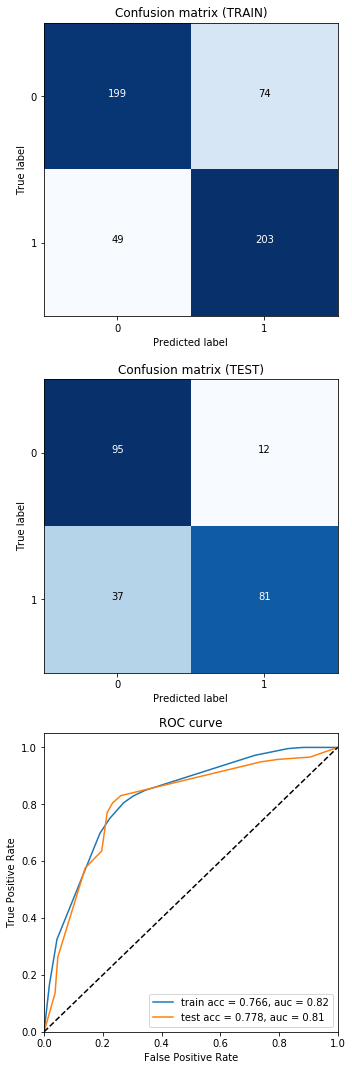

In [59]:

################ CT & ROC/AUC Plot for train & test data 
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix
#from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score

threshold = 0.5
y_train_pred = clf_tree.predict_proba(X_train)[:,1]
y_test_pred = clf_tree.predict_proba(X_test)[:,1]

fig,ax = plt.subplots(3,1)
fig.set_size_inches(5,15)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_pred_en,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()



Text(0.5,1,'Confusion Matrix on Test Data')

Text(0.5,15,'Predicted')

Text(33,0.5,'Actual')

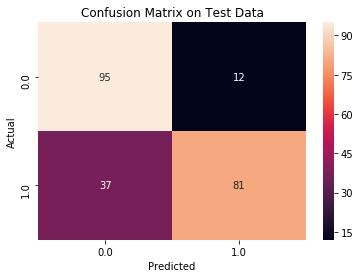

In [30]:
## Another CF Matrix
import pylab as pl
ax=sns.heatmap(pd.crosstab(y_test, y_pred_en), annot=True, fmt='.0f')
ax.set_title('Confusion Matrix on Test Data')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.plt.show()

In [34]:
#import os     
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#import GraphViz 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

col_names=X_train.columns.difference(['Result'])
export_graphviz(clf_tree,
              out_file = "DT_Contract.dot",
              feature_names = X_train.columns )

import pydotplus as pdot
plot_it = pdot.graphviz.graph_from_dot_file('DT_Contract.dot')
plot_it.write_jpg( 'DT_Contract.jpg' )

from IPython.display import Image
Image(filename='DT_Contract.jpg')


InvocationException: GraphViz's executables not found

In [42]:
#import os     
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#import GraphViz 
#from Graphviz import Source
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

col_names=X_train.columns.difference(['Result'])
dot_dt=export_graphviz(clf_tree,
              out_file = None,
              feature_names = X_train.columns )

import pydotplus as pdot
plot_it = pdot.graphviz.graph_from_dot_data(dot_dt)
# Show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [42]:
#import os     
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#import GraphViz 
#from Graphviz import Source
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

col_names=X_train.columns.difference(['Result'])
dot_dt=export_graphviz(clf_tree,
              out_file = None,
              feature_names = X_train.columns )

import pydotplus as pdot
plot_it = pdot.graphviz.graph_from_dot_data(dot_dt)
#plot_it.write_jpg( 'DT_Contract.jpg' )
#Image(plot_it.create_png())
#from IPython.display import Image
#Image(filename='DT_Contract.jpg')


InvocationException: GraphViz's executables not found

In [33]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
col_names=X_train.columns.difference(['Result'])
export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found